Logistic regression: Predict the fraud Transaction

In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [151]:
fraud_df=pd.read_csv("card_transdata.csv.zip")
fraud_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [152]:
fraud_df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [153]:
fraud_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [154]:
fraud_df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [155]:
fraud_df.shape

(1000000, 8)

In [156]:
X = fraud_df.drop('online_order', axis=1)
y = fraud_df['online_order']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
print(X_test)

        distance_from_home  distance_from_last_transaction  \
987231            0.929509                        1.296477   
79954             0.611179                        0.208295   
567130            3.956062                        0.529194   
500891           21.798902                        0.019399   
55399             3.310635                        1.707802   
...                    ...                             ...   
90245            56.686649                        0.820179   
639296            5.544863                        0.072644   
311939            4.449740                        2.045690   
324459           34.624330                        0.580115   
390499            2.640109                        0.503444   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
987231                        0.361110              0.0        0.0   
79954                         3.118884              0.0        0.0   
567130                        1.579942       

In [159]:
model = LogisticRegression()


In [160]:
model.fit(X_train, y_train)

LogisticRegression()

In [161]:
y_pred = model.predict(X_test)

In [162]:
print(model.predict)

<bound method LinearClassifierMixin.predict of LogisticRegression()>


In [163]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [164]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.668695
Confusion Matrix:
[[  4868  65034]
 [  1227 128871]]


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [166]:
('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))


('Mean Absolute Error:', 0.331305)

In [167]:
('Mean Squared Error:', mean_squared_error(y_test, y_pred))

('Mean Squared Error:', 0.331305)

In [168]:

('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

('Root Mean Squared Error:', 0.5755910006245755)

In [169]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [170]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']

In [171]:
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [172]:
from joblib import load
model = load('model.joblib')

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

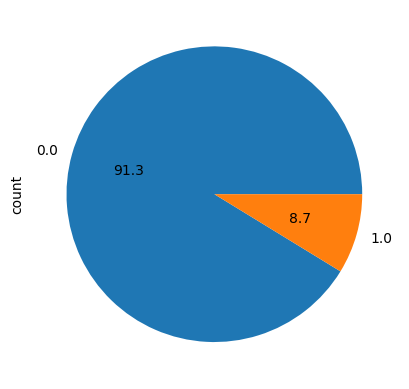

In [173]:
fraud_df.value_counts("fraud").plot.pie(autopct = "%.1f")
fraud_df.value_counts("fraud")

In [174]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [175]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [176]:
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.668695
Recall: 0.990568648249781
Precision: 0.6646089579948944
F1 Score: 0.79549263432746


In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [178]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

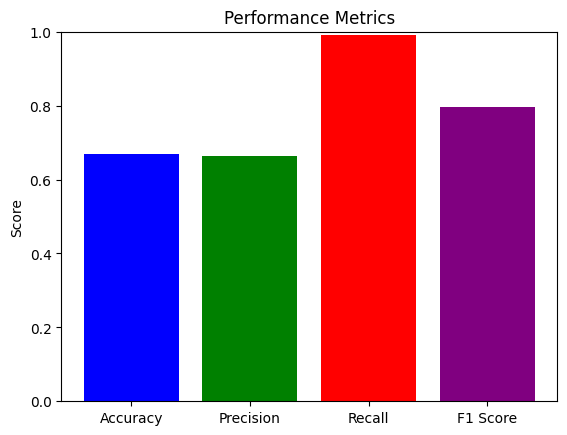

In [179]:
plt.bar(labels, scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

In [180]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

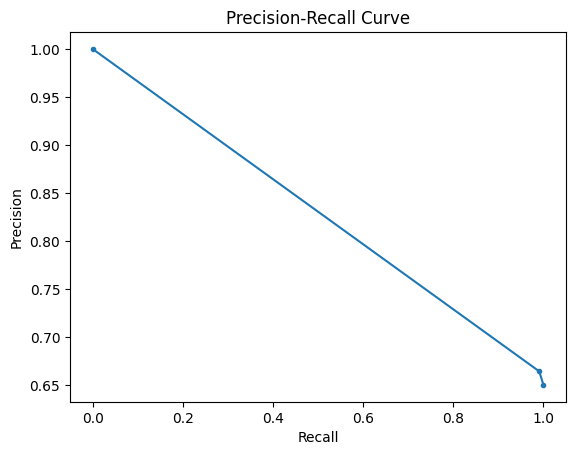

In [181]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import seaborn as sns

In [183]:
TP = [1, 1]
TN = [0, 0]
FP = [0, 1]
FN = [1, 0]


TypeError: unhashable type: 'list'

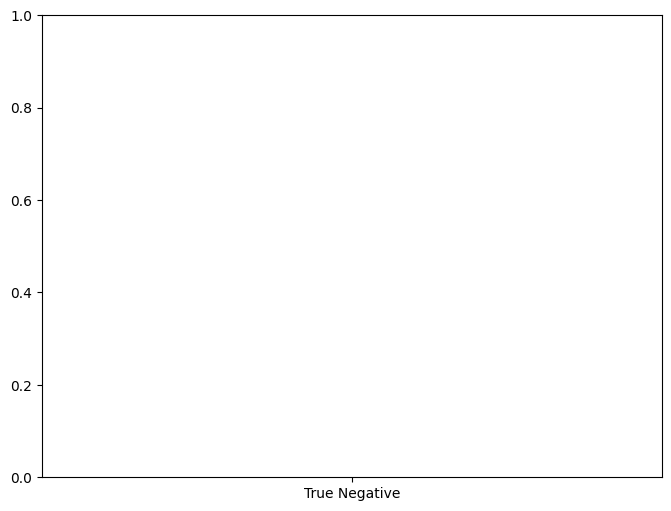

In [184]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [TN, FP, FN, TP]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values)
plt.title('Confusion Matrix')
plt.ylabel('Count')
plt.show()

In [185]:
LogReg_model = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state = 42)
LogReg_model.fit(X_train, y_train)
y_pred = LogReg_model.predict(X_test)
y_train_pred = LogReg_model.predict(X_train)

In [186]:
LogReg_model_f1 = f1_score(y_test, y_pred)
LogReg_model_acc = accuracy_score(y_test, y_pred)
LogReg_model_recall = recall_score(y_test, y_pred)
LogReg_model_auc = roc_auc_score(y_test, y_pred)
LogReg_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
LogReg_model_recall_auc = auc(recall,precision)
                              

In [200]:
print("LogReg_Model")
print ("------------------")
result=eval(LogReg_model,{X_test,X_test})

LogReg_Model
------------------


TypeError: unhashable type: 'DataFrame'

In [ ]:
from flask import Flask, request, jsonify
import pickle

In [ ]:
app = Flask(__name__)

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
app.route('/predict', methods=['POST'])
def predict():
    
    data = request.get_json()
    
    online_order = [data['distance_from_last_transaction'], data['ratio_to_median_purchase_price'], data['used_pin_number']]


In [ ]:
prediction =model.predict(['online_order'])

c:\Users\milla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=['online_order'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
return =jsonify({'prediction': prediction}) 

SyntaxError: invalid syntax (3255212242.py, line 1)

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\milla\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# logistic_regression = pickle.dump(LogReg_Deploy, open('logistic_regression_model', 'wb')

SyntaxError: unterminated string literal (detected at line 11) (201585936.py, line 11)

SyntaxError: invalid non-printable character U+00A0 (926949935.py, line 7)